In [36]:
# import necessary libraries and tools
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv")

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [37]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = df.drop(columns=['CustomerID'])

df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)' ]

X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns = features)
print(X_scaled_df.head())


        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


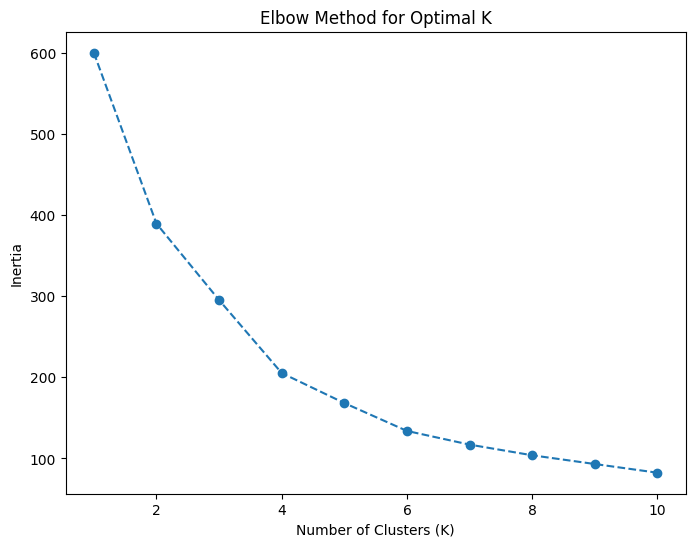

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

k_range = range(1, 11)

for k in k_range:
  kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

plt.figure(figsize = (8, 6))
plt.plot(k_range, inertia, marker = 'o', linestyle = '--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [59]:
# Apply K-Means with K=5

kmeans = KMeans(n_clusters = 6, random_state = 42, n_init = 10)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

print(df.head())


   Gender  Age  Annual Income (k$)  Spending Score (1-100)  KMeans_Cluster  \
0       1   19                  15                      39               4   
1       1   21                  15                      81               4   
2       0   20                  16                       6               5   
3       0   23                  16                      77               4   
4       0   31                  17                      40               5   

   DBSCAN_Cluster  
0              -1  
1               0  
2              -1  
3               0  
4              -1  


In [83]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = .99, min_samples = 5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

print(df.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  KMeans_Cluster  \
0       1   19                  15                      39               4   
1       1   21                  15                      81               4   
2       0   20                  16                       6               5   
3       0   23                  16                      77               4   
4       0   31                  17                      40               5   

   DBSCAN_Cluster  
0               0  
1               0  
2              -1  
3               0  
4               0  


In [84]:
from sklearn.metrics import silhouette_score

# Compute Silhouette Scores
kmeans_silhouette = silhouette_score(X_scaled, df["KMeans_Cluster"])
dbscan_silhouette = silhouette_score(X_scaled, df["DBSCAN_Cluster"]) if len(set(df["DBSCAN_Cluster"])) > 1 else None

# Print results
print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.3f}" if dbscan_silhouette else "DBSCAN failed to form good clusters.")

K-Means Silhouette Score: 0.428
DBSCAN Silhouette Score: 0.313


In [85]:
print(df['DBSCAN_Cluster'].value_counts())

DBSCAN_Cluster
 0    198
-1      2
Name: count, dtype: int64


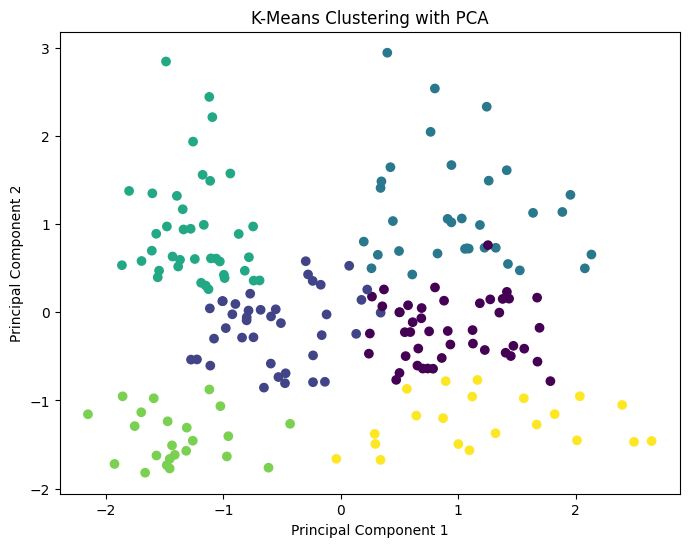

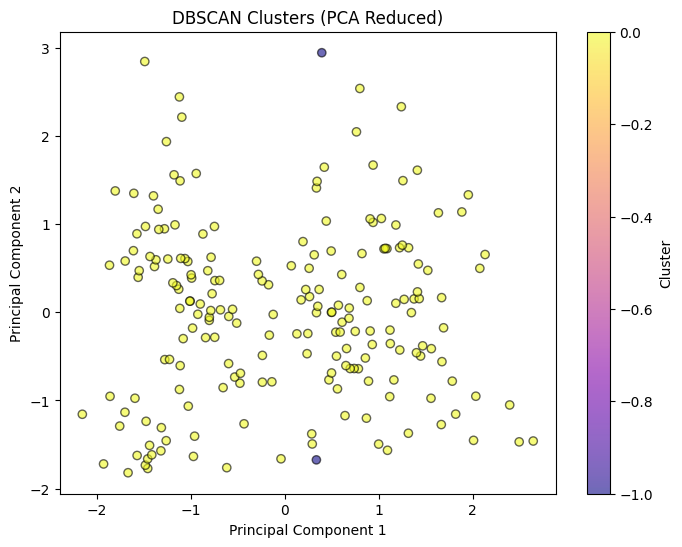

In [90]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize = (8, 6))
plt.scatter(df['PCA1'], df['PCA2'], c = df['KMeans_Cluster'], cmap = 'viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(df["PCA1"], df["PCA2"], c=df["DBSCAN_Cluster"], cmap="plasma", alpha=0.6, edgecolors="k")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("DBSCAN Clusters (PCA Reduced)")
plt.colorbar(label="Cluster")
plt.show()

In [91]:
df.groupby('KMeans_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
KMeans_Cluster,,,
0,56.333333,54.266667,49.066667
1,26.794872,57.102564,48.128205
2,41.939394,88.939394,16.969697
3,32.692308,86.538462,82.128205
4,25.000000,25.260870,77.608696
5,45.523810,26.285714,19.380952


In [92]:
cluster_profile = df.groupby('KMeans_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)
cluster_profile['Count'] = df['KMeans_Cluster'].value_counts().sort_index()
print(cluster_profile)

                 Age  Annual Income (k$)  Spending Score (1-100)  Count
KMeans_Cluster                                                         
0               56.3                54.3                    49.1     45
1               26.8                57.1                    48.1     39
2               41.9                88.9                    17.0     33
3               32.7                86.5                    82.1     39
4               25.0                25.3                    77.6     23
5               45.5                26.3                    19.4     21


In [93]:
cluster_names = {
    0: "Mature Moderate Spenders",
    1: "Young Professionals",
    2: "High Earners, Low Spenders",
    3: "Premium Buyers",
    4: "Young Spenders",
    5: "Low Income, Low Engagement"
}

df['Segment'] = df['KMeans_Cluster'].map(cluster_names)

In [97]:
import joblib

joblib.dump(scaler, 'scaler.pkl')
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [99]:
from google.colab import files

files.download('scaler.pkl')
files.download('kmeans_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>